In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from QLearning import QLearner

In [2]:
env = gym.make('CartPole-v0')
print(env.observation_space.sample())
print(env.observation_space.low)
print(env.observation_space.high)

[-2.4991131e+00 -1.3260670e+38 -2.2670212e-01 -1.6599941e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


### The algorithm:
1. Discretize the observation space with parameters
2. Form the Q-Table
3. Determine alpha, gama, epsilon and decay rate
4. Implement Q-Learning
    - Start with state s, total reward 0
    - While not done do:
        - At state s, perform random for epsilon possibility, perform best action with Q value for 1-epsilon (a)
        - Get the new state (s') and the reward (r), add to total reward
        - Calculate the new Q value for state s and action a -> Qnew = Q + alpha * [ r + gama * max(Q value of s' for all actions of s') - Q ]
        - Update the Q value for state s, action a
        - s = s'
        - epsilon = epsilon * decay
    - Output the total reward and start new episode

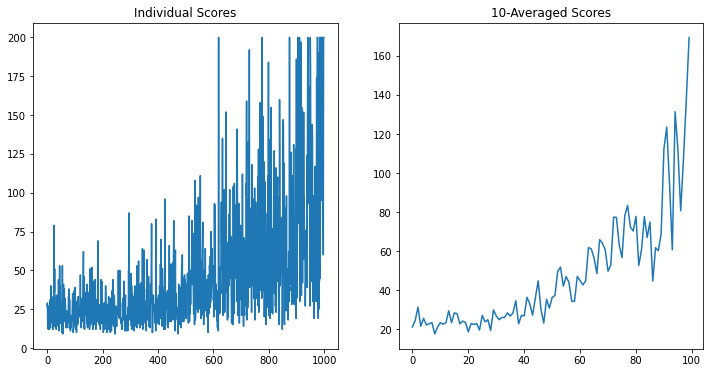

In [3]:
# After some tests, I found that 20 discrete state for each dimension is best.
# I also restricted the state space limits to a smaller range based on test results
env = gym.make('CartPole-v0')
learner = QLearner(env, discrete_space_size=20, space_limits=[
                    (-3, 3), (-5, 5), (-0.4, 0.4), (-5, 5)], alpha=0.15, gama=0.95, epsilon=0.99, decay_rate=0.99995)
learner.run(1000, render=False)

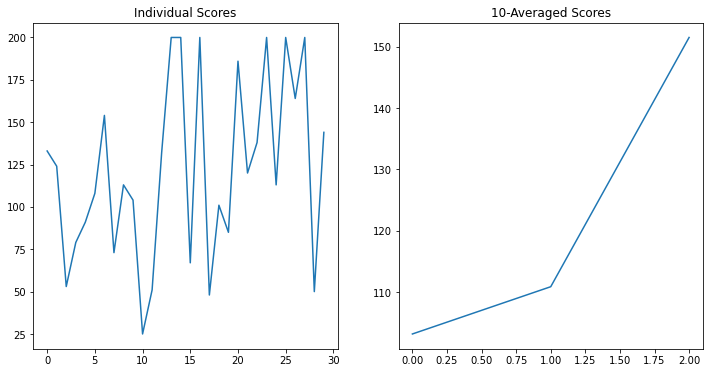

In [5]:
# now the agent developed a policy, we can see that it reaches even 200 scores
learner.run(30, render=True)